In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
# Load Simulator Backend
backend = Aer.get_backend('statevector_simulator')

# Microsoft Q# Coding Contest - Summer 2018 - Warmup Round June 29 - July 2, 2018

## G. Oracle for f(x) = k-th element of x
Implement a quantum oracle on $N$ qubits which implements a function $f(x) = x_k$, i.e. the value of the function is the value of the k-th qubit.<br>

You have to implement an operation which takes the following inputs:
 - an array of qubits x (input register), <br>
 - a qubit y (output qubit), <br>
 - 0-based index of the qubit from input register k (0 ≤ k < Length(x)). <br>

The operation doesn’t have an output; the “output” of your solution is the state in which it left the qubits.

In [4]:
def solution7(circuit, k):
    circuit.cx(k, circuit.num_qubits-1)
    return circuit

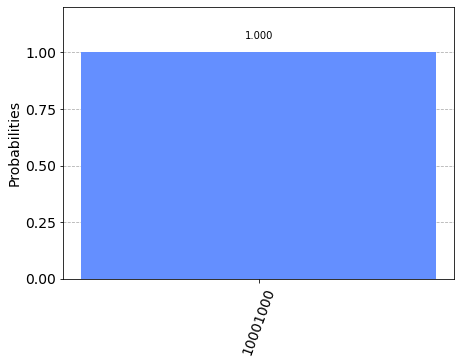

In [6]:
circ = QuantumCircuit(8)
circ.x(3)
circ = solution7(circ, 3)
result = execute(circ, backend).result()
counts = result.get_counts()
plot_histogram(counts)

## H. Oracle for f(x) = parity of the number of 1s in x
Implement a quantum oracle on $N$ qubits which implements the following function: $f(x) = \sum_{i} x_i$ mod 2, i.e., the value of the function is 1 if x has odd number of 1s, and 0 otherwise.
You have to implement an operation which takes the following inputs:

 - an array of qubits x (input register), <br>
 - a qubit y (output qubit). <br>
 
The operation doesn’t have an output; the ”output” of your solution is the state in which it left the qubits.

In [7]:
def solution8(circuit):
    for i in range(circuit.num_qubits-2):
        circuit.cx(i, circuit.num_qubits-1)
    return circuit

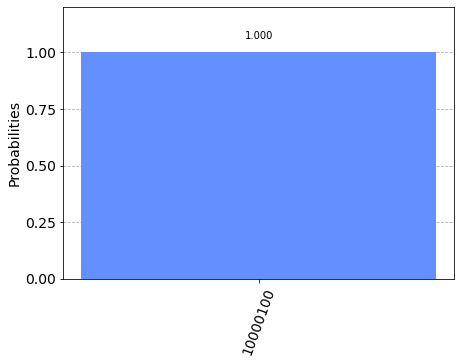

In [9]:
circ = QuantumCircuit(8)
circ.x(2)
circ = solution8(circ)
result = execute(circ, backend).result()
counts = result.get_counts()
plot_histogram(counts)

## I. Deutsch-Jozsa algorithm
You are given a quantum oracle - an operation on $N+1$ qubits which implements a function $f : \{0, 1\}^N → {0, 1}$. You are guaranteed that the function $f$ implemented by the oracle is either constant (returns 0 on all inputs or 1 on all inputs) or balanced (returns 0 on exactly one half of the input domain and 1 on the other half). <br>

There are only two possible constant functions: $f(x) = 0$ and $f(x) = 1$. The functions implemented by oracles in the two previous problems ($f(x) = x_k$ and $f(x) = \sum_{i} x_i$ mod 2) are examples of balanced functions. <br>

Your task is to figure out whether the function given by the oracle is constant. Your code is allowed to call the given oracle only once. <br>

You have to implement an operation which takes the following inputs:

 - an integer $N$ - the number of qubits in the oracle input,
 - an oracle $U_f$, is an operation which takes as input an array of qubits and an output qubit and has no output.
 
The return of your operation is a Boolean value: true if the oracle implements a constant function and false otherwise.

In [18]:
func = 'B'

def classical_oracle(input_array):
    if func == 'B':
        N = len(input_array)-2
        return '1' if int(input_array, base=2) == 2**(N-1) else '0'
    else:
        return '0'
def quantum_oracle(circuit):
    if func == 'B':
        circuit.cx(circuit.num_qubits//2, circuit.num_qubits-1)
    else:
        pass
    return circuit

In [16]:
def solution9(N, oracle):
    if oracle == 'classic':
        count = {'0':0, '1':0}
        for i in range(2**(N-1)+1):
            binary = bin(i)
            count[classical_oracle(binary)] += 1
        return 0 if (count['0']==0 or count['1']==0) else 1
    else:
        circ = QuantumCircuit(N+1, N)
        for i in range(circ.num_qubits-1):
            circ.h(i)
        circ.x(circ.num_qubits-1)
        circ.h(circ.num_qubits-1)
        circ = quantum_oracle(circ)
        for i in range(circ.num_qubits-1):
            circ.h(i)
        for i in range(circ.num_qubits-1):
            circ.measure(i, i)
        return circ

In [15]:
output = solution9(8, 'classic')
print(output)

0


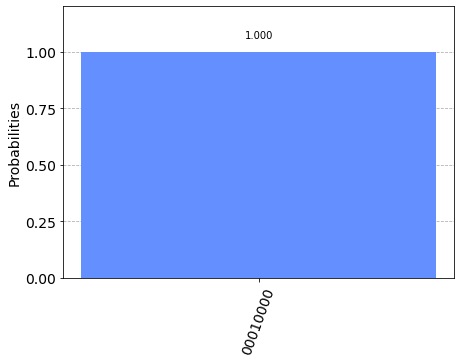

In [19]:
circ = solution9(8, 'quantum')
result = execute(circ, backend).result()
counts = result.get_counts()
plot_histogram(counts)